In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/few3-shot-finance-reduced-50/Few_Shot_Finance_Reduced_50.csv
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/model.safetensors.index.json
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/config.json
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/model-00001-of-00002.safetensors
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/model-00002-of-00002.safetensors
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/pytorch_model-00002-of-00002.bin
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/README.md
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/USE_POLICY.md
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/tokenizer.json
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/tokenizer_config.json
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/pytorch_model.bin.index.json
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/LICENSE.txt
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/pytorch_model-00001-of-00002.bin
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/special_tokens_map.json
/kaggle/input/llama-2/pytorch/7b-chat-hf/1/.gitattributes
/kaggle/i

In [ ]:
import os
import platform
import psutil
import tensorflow as tf

# Processor information
processor = platform.processor()

# Number of CPU cores
core_count = psutil.cpu_count(logical=False)

# CPU speed
cpu_speed = psutil.cpu_freq().current

# RAM information
ram_info = psutil.virtual_memory()
ram_total = ram_info.total

# GPU information
gpu_info = !nvidia-smi --query-gpu=gpu_name,driver_version --format=csv
gpu_name = gpu_info[1].split(',')[0].strip()
gpu_driver_version = gpu_info[1].split(',')[1].strip()

# Display the information
print(f"Processor: {processor}")
print(f"Number of Cores: {core_count}")
print(f"CPU Speed: {cpu_speed} MHz")
print(f"RAM: {ram_total / (1024 ** 3):.2f} GB")
print(f"GPU: {gpu_name} (Driver Version: {gpu_driver_version})")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Processor: x86_64
Number of Cores: 2
CPU Speed: 2000.15 MHz
RAM: 31.36 GB
GPU: Tesla P100-PCIE-16GB (Driver Version: 535.129.03)


In [ ]:
import torch
from torch import cuda
import time
import pandas as pd
import numpy as np
import random

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import transformers

model_id = '/kaggle/input/llama-2/pytorch/7b-chat-hf/1'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_config, device_map="auto")

tokenizer = AutoTokenizer.from_pretrained(model_id)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

print(f"Model loaded on {device}")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/configuratio

Model loaded on cuda:0


In [ ]:
max_seq_length_1 = tokenizer.model_max_length

print("Maximum Sequence Length:", max_seq_length_1)

Maximum Sequence Length: 1000000000000000019884624838656


In [ ]:
model.config

LlamaConfig {
  "_name_or_path": "/kaggle/input/llama-2/pytorch/7b-chat-hf/1",
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 1,
  "eos_token_id": 2,
  "hidden_act": "silu",
  "hidden_size": 4096,
  "initializer_range": 0.02,
  "intermediate_size": 11008,
  "max_length": 4096,
  "max_position_embeddings": 2048,
  "model_type": "llama",
  "num_attention_heads": 32,
  "num_hidden_layers": 32,
  "num_key_value_heads": 32,
  "pad_token_id": 0,
  "pretraining_tp": 1,
  "quantization_config": {
    "_load_in_4bit": true,
    "_load_in_8bit": false,
    "bnb_4bit_compute_dtype": "bfloat16",
    "bnb_4bit_quant_type": "nf4",
    "bnb_4bit_use_double_quant": true,
    "llm_int8_enable_fp32_cpu_offload": false,
    "llm_int8_has_fp16_weight": false,
    "llm_int8_skip_modules": null,
    "llm_int8_threshold": 6.0,
    "load_in_4bit": true,
    "load_in_8bit": false,
    "quant_method": "bitsandbytes"
  },
  "rms_norm_eps"

In [ ]:
special_tokens = tokenizer.special_tokens_map
print(special_tokens)

{'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '</s>'}


### Dataset Loading & Preprocessing

In [ ]:
file_path_1 = "/kaggle/input/finance-bench-dataset/10_labels.csv"
file_path_2 = "/kaggle/input/finance-bench-dataset/syntheses_10.csv"
Model_Generated_Data = pd.read_csv(file_path_1)
Finance_data = pd.read_csv(file_path_2)

In [ ]:
# Reduce Finance_data to the first 50 rows
Finance_Reduced = Finance_data.head(50)

# Zero Shot Prompt Engineering

In [ ]:
template ="""
<s>[INST] <<SYS>>
You are a financial chatbot trained to answer questions based on the information provided.
Your responses should be directly sourced from the content of these evidence_text(context).
When asked a question, ensure that your answer is explicitly supported by the text and do not
include any external information, interpretations, or assumptions not clearly stated in the evidence_text(context).
If a question pertains to financial data or analysis that is not explicitly covered in the evidence_text(context) provided,
respond by stating that the information is not available in the evidence_text(context).
Your primary focus should be on accuracy, specificity, and adherence to the information in the evidence_text(context),
particularly regarding financial statements, company performance, and market positions.

Here is the question:
{question}

Consider the provided text as evidence:
{evidence_text}
[/INST]

"""

syntheses_with_llama = []

for idx, row in Finance_Reduced.iterrows():
    question = row['question']
    evidence_text = row['evidence_text']

  # Construct prompt with context
    prompt = template.format(question=question, evidence_text=evidence_text)
    #print(prompt)

    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate response
    output = model.generate(input_ids=inputs["input_ids"], max_new_tokens=100)

    # Decode the response
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    #Finding Extracted Answer
    answer_start = generated_text.find("[/INST]") + len("[/INST]")  # Find the end of </INST> tag
    answer = generated_text[answer_start:]  # Extract everything after that position
    syntheses_with_llama.append(answer)
    #print(answer)

    #Comparing the answer with the base answer
    dash_line = '-'.join('' for x in range(100))
    Answer = Finance_Reduced.loc[idx, 'answer']
#     print(f'BASELINE HUMAN ANSWER:\n{Answer}\n')
#     print(dash_line)
#     print(f'MODEL GENERATION - ZERO SHOT:\n{answer}')
#     print(dash_line)

#Appending it to main file
Finance_Reduced['Generated_BY_LLAMA2'] = syntheses_with_llama

In [ ]:
Finance_Reduced.head()

In [ ]:
from IPython.display import FileLink
Zero_Shot_Finance_Reduced_50 = Finance_Reduced.rename(columns={'question': 'question', 'answer': 'answer', 'evidence_text': 'evidence_text', 'syntheses': 'syntheses', 'Generated_BY_LLAMA2': 'Generated_BY_LLAMA2'})
Zero_Shot_Finance_Reduced_50.to_csv('Zero_Shot_Finance_Reduced_50.csv', index=False)
FileLink('Zero_Shot_Finance_Reduced_50.csv')

### Test zero shot

In [ ]:
import pandas as pd

file_path_3 = "/kaggle/input/zero-shot-finance-reduced-50/Zero_Shot_Finance_Reduced_50.csv"
zero_shot_test = pd.read_csv(file_path_3)
zero_shot_test.head()

,question,answer,evidence_text,syntheses,Generated_BY_LLAMA2
0,What is the FY2018 capital expenditure amount ...,$1577.00,Table of Contents \n3M Company and Subsidiarie...,"<answer> $1,577 </answer>",\n\nBased on the information provided in the c...
1,Assume that you are a public equities analyst....,$8.70,Table of Contents \n3M Company and Subsidiarie...,<answer> $8.738 </answer>,\n\nBased on the information provided in the b...
2,Is 3M a capital-intensive business based on FY...,"No, the company is managing its CAPEX and Fixe...",3M Company and Subsidiaries\n Consolidated Sta...,"<answer> No, 3M does not seem to be a capital...","\n\nBased on the provided evidence, the answer..."
3,What drove operating margin change as of FY202...,Operating Margin for 3M in FY2022 has decrease...,"SG&A, measured as a percent of sales, increase...",<answer> Operating Margin for 3M in FY2022 ha...,"\n\nBased on the provided evidence text, the o..."
4,"If we exclude the impact of M&A, which segment...",The consumer segment shrunk by 0.9% organically.,Worldwide Sales Change\nBy Business Segment Or...,<answer> The consumer segment shrunk by 0.9% ...,"\n\nBased on the provided evidence text, the a..."


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from typing import List
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
def compute_rouge_l(candidate, reference):
    m, n = len(candidate), len(reference)
    #print(m,n)
    dp_table = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if candidate[i - 1] == reference[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])

    return dp_table[m][n] / n

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    return filtered_tokens

In [ ]:
def compute_similarity_score(answer,syntheses):
    tokens_answer = preprocess_text(answer)
    tokens_syntheses = preprocess_text(syntheses)
    str_answer = ' '.join(tokens_answer)
    str_syntheses = ' '.join(tokens_syntheses)
    freqdist_answer = nltk.FreqDist(str_answer.split())
    freqdist_syntheses = nltk.FreqDist(str_syntheses.split())
    # Extract frequencies for unique tokens in both texts
    unique_tokens = set(freqdist_answer.keys()).union(freqdist_syntheses.keys())

    freq_answer = [freqdist_answer[token] for token in unique_tokens]
    freq_syntheses = [freqdist_syntheses[token] for token in unique_tokens]

    vector_answer = np.array(freq_answer).reshape(1, -1)
    vector_syntheses = np.array(freq_syntheses).reshape(1, -1)

    similarity_score = cosine_similarity(vector_answer, vector_syntheses)[0][0]

    return similarity_score

In [ ]:
import numpy as np

tfidf_vectorizer = TfidfVectorizer

total_average_rouge_l_scores = []
total_average_cosine_similarity_scores  = []

num_labels = []
count = 0

for i in range(5):
    count += 10
    num_labels.append(count)
    #print(num_labels)
    df = zero_shot_test.head(count)
    #print(len(df))

    rouge_l_scores = []
    cosine_similarity_scores = []

    for idx, row in df.iterrows():
        answer = row['answer']
        syntheses = row['Generated_BY_LLAMA2']



        compute_sim_score = compute_similarity_score(answer,syntheses)
        cosine_similarity_scores.append(compute_sim_score)




        rouge_l_score = compute_rouge_l(answer, syntheses)
        rouge_l_scores.append(rouge_l_score)


    total_average_cosine_similarity_score = sum(cosine_similarity_scores) / len(cosine_similarity_scores)
    total_average_cosine_similarity_scores.append(total_average_cosine_similarity_score)


    total_average_rouge_l_score = sum(rouge_l_scores)/len(rouge_l_scores)
    total_average_rouge_l_scores.append(total_average_rouge_l_score)

    #print(total_average_cosine_similarity_scores)
    #print(total_average_rouge_l_scores)

Text(0.5, 1.0, ' After Fine-Tuning ROUGE-L Score Comparison')

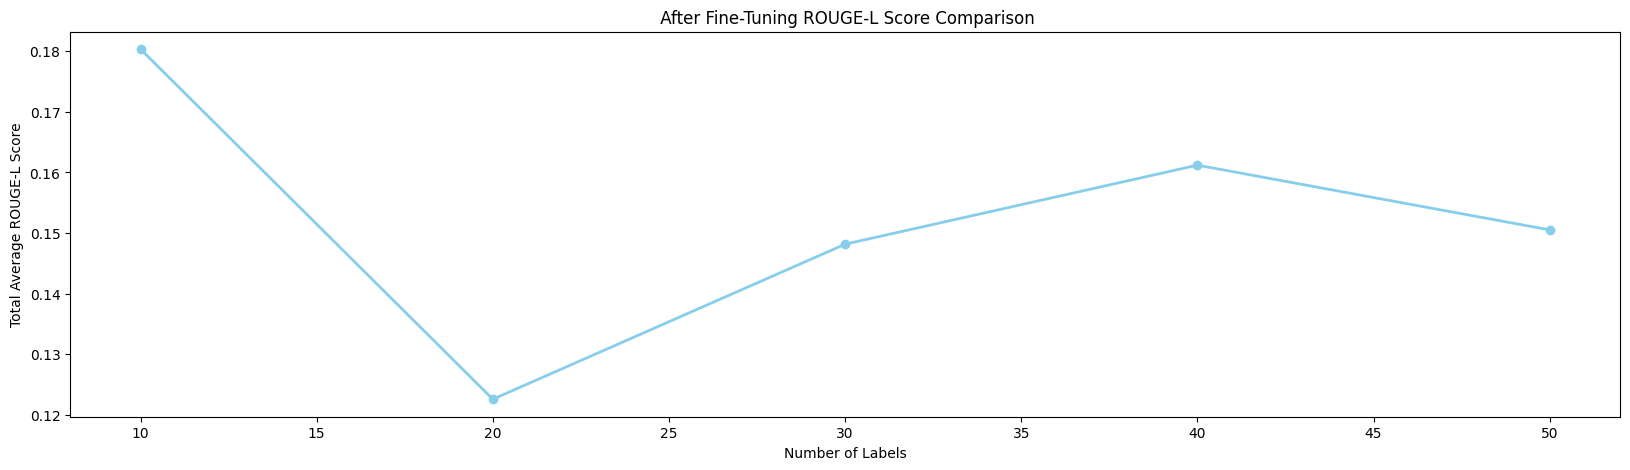

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

plt.figure(figsize=(20, 5))

# Plot Accuracy
#plt.subplot(1, 3, 1)
plt.plot(num_labels, total_average_rouge_l_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.xlabel('Number of Labels')
plt.ylabel('Total Average ROUGE-L Score')
plt.title(' After Fine-Tuning ROUGE-L Score Comparison')

plt.subplot(1, 3, 2)
plt.plot(num_labels, total_average_cosine_similarity_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.xlabel('Number of Labels')
plt.ylabel('Total Average Cosine Similarity Score')
plt.title(' After Fine-Tuning Cosine Similarity Score')

### Zero Shot test Finished

# Few shot Prompt Engineering

In [ ]:
template ="""
<s>[INST] <<SYS>>
You are a financial chatbot trained to answer questions based on the information provided.
Your responses should be directly sourced from the content of these evidence_text(context).
When asked a question, ensure that your answer is explicitly supported by the text and do not
include any external information, interpretations, or assumptions not clearly stated in the evidence_text(context).
If a question pertains to financial data or analysis that is not explicitly covered in the evidence_text(context) provided,
respond by stating that the information is not available in the evidence_text(context).
Your primary focus should be on accuracy, specificity, and adherence to the information in the evidence_text(context),
particularly regarding financial statements, company performance, and market positions.
<</SYS>>

Here are some sample Questions, evidence text and answers.

question 1: Was there any drop in Cash & Cash equivalents between FY 2023 and Q2 of FY2024?
evidence_text 1: July 29, 2023 January 28, 2023 July 30, 2022 Cash and cash equivalents $ 1,093 $ 1,874 $ 840
answer 1: Yes, there was a decline of ~42% between FY2023 and Q2 of FY 2024.

question 2: We need to calculate a financial metric by using information only provided within the balance sheet. Please answer the following question: what is Boeing's year end FY2018 net property, plant, and equipment (in USD millions)?
evidence_text 2: Table of Contents The Boeing Company and Subsidiaries Consolidated Statements of Financial Position   (Dollars in millions, except per share data)       December 31, 2018   2017 Assets       Cash and cash equivalents $7,637   $8,813 Short-term and other investments 927   1,179 Accounts receivable, net 3,879   2,894 Unbilled receivables, net 10,025   8,194 Current portion of customer financing, net 460   309 Inventories 62,567   61,388 Other current assets 2,335   2,417 Total current assets 87,830   85,194 Customer financing, net 2,418   2,756 Property, plant and equipment, net 12,645   12,672 Goodwill 7,840   5,559 Acquired intangible assets, net 3,429   2,573 Deferred income taxes 284   321 Investments 1,087   1,260 Other assets, net of accumulated amortization of $503 and $482 1,826   2,027 Total assets $117,359   $112,362 Liabilities and equity       Accounts payable $12,916   $12,202 Accrued liabilities 14,808   13,069 Advances and progress billings 50,676   48,042 Short-term debt and current portion of long-term debt 3,190   1,335 Total current liabilities 81,590   74,648 Deferred income taxes 1,736   2,188 Accrued retiree health care 4,584   5,545 Accrued pension plan liability, net 15,323   16,471 Other long-term liabilities 3,059   2,015 Long-term debt 10,657   9,782 Shareholders’ equity:       Common stock, par value $5.00 – 1,200,000,000 shares authorized; 1,012,261,159 shares issued 5,061   5,061 Additional paid-in capital 6,768   6,804 Treasury stock, at cost (52,348)   (43,454) Retained earnings 55,941   49,618 Accumulated other comprehensive loss (15,083)   (16,373) Total shareholders’ equity 339   1,656 Noncontrolling interests 71   57 Total equity 410   1,713 Total liabilities and equity $117,359   $112,362 See Notes to the Consolidated Financial Statements on pages 54 – 113 . 50
answer 2: $12645.00

question 3: At the Pepsico AGM held on May 3, 2023, what was the outcome of the shareholder vote on the shareholder proposal for a congruency report by Pepsico on net-zero emissions policies?
evidence_text 3: (8) The shareholder proposal regarding a congruency report on net-zero emissions policies was defeated: For 19,718,780 Against 977,228,788
answer 3: The shareholder proposal for a congruency report by Pepsico on net-zero emissions policies was defeated.

Now give answer to questions provided below from the evidence text.

Here is the question:
{question}

Consider the provided text as evidence:
{evidence_text}
[/INST]

"""

syntheses_with_llama = []

for idx, row in Finance_Reduced.iterrows():
    question = row['question']
    evidence_text = row['evidence_text']

  # Construct prompt with context
    prompt = template.format(question=question, evidence_text=evidence_text)
    #print(prompt)

    # Tokenize the prompt
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate response
    output = model.generate(input_ids=inputs["input_ids"], max_new_tokens=100)

    # Decode the response
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    #Finding Extracted Answer
    answer_start = generated_text.find("[/INST]") + len("[/INST]")  # Find the end of </INST> tag
    answer = generated_text[answer_start:]  # Extract everything after that position
    syntheses_with_llama.append(answer)
    #print(answer)

    #Comparing the answer with the base answer
    dash_line = '-'.join('' for x in range(100))
    Answer = Finance_Reduced.loc[idx, 'answer']
#     print(f'BASELINE HUMAN ANSWER:\n{Answer}\n')
#     print(dash_line)
#     print(f'MODEL GENERATION - ZERO SHOT:\n{answer}')
#     print(dash_line)

#Appending it to main file
Finance_Reduced['Generated_BY_LLAMA2'] = syntheses_with_llama

In [ ]:
from IPython.display import FileLink
Few_Shot_Finance_Reduced_50 = Finance_Reduced.rename(columns={'question': 'question', 'answer': 'answer', 'evidence_text': 'evidence_text', 'syntheses': 'syntheses', 'Generated_BY_LLAMA2': 'Generated_BY_LLAMA2'})
Few_Shot_Finance_Reduced_50.to_csv('Few_Shot_Finance_Reduced_50.csv', index=False)
FileLink('Few_Shot_Finance_Reduced_50.csv')

### Test Model

In [ ]:
import pandas as pd

file_path_4 = "/kaggle/input/few3-shot-finance-reduced-50/Few_Shot_Finance_Reduced_50.csv"
few_shot_test = pd.read_csv(file_path_4)
few_shot_test.head()

,question,answer,evidence_text,syntheses,Generated_BY_LLAMA2
0,What is the FY2018 capital expenditure amount ...,$1577.00,Table of Contents \n3M Company and Subsidiarie...,"<answer> $1,577 </answer>",\n\nThe FY2018 capital expenditure amount for ...
1,Assume that you are a public equities analyst....,$8.70,Table of Contents \n3M Company and Subsidiarie...,<answer> $8.738 </answer>,\n\nBased on the information provided in the b...
2,Is 3M a capital-intensive business based on FY...,"No, the company is managing its CAPEX and Fixe...",3M Company and Subsidiaries\n Consolidated Sta...,"<answer> No, 3M does not seem to be a capital...",\n\nOf course! I'll do my best to provide accu...
3,What drove operating margin change as of FY202...,Operating Margin for 3M in FY2022 has decrease...,"SG&A, measured as a percent of sales, increase...",<answer> Operating Margin for 3M in FY2022 ha...,\n\nThank you for asking! Based on the evidenc...
4,"If we exclude the impact of M&A, which segment...",The consumer segment shrunk by 0.9% organically.,Worldwide Sales Change\nBy Business Segment Or...,<answer> The consumer segment shrunk by 0.9% ...,"\n\nThank you for providing the questions, evi..."


In [ ]:
tfidf_vectorizer = TfidfVectorizer

total_average_rouge_l_scores = []
total_average_cosine_similarity_scores  = []

num_labels = []
count = 0

for i in range(5):
    count += 10
    num_labels.append(count)
    #print(num_labels)
    df = few_shot_test.head(count)
    #print(len(df))

    rouge_l_scores = []
    cosine_similarity_scores = []

    for idx, row in df.iterrows():
        answer = row['answer']
        syntheses = row['Generated_BY_LLAMA2']



        compute_sim_score = compute_similarity_score(answer,syntheses)
        cosine_similarity_scores.append(compute_sim_score)




        rouge_l_score = compute_rouge_l(answer, syntheses)
        rouge_l_scores.append(rouge_l_score)


    total_average_cosine_similarity_score = sum(cosine_similarity_scores) / len(cosine_similarity_scores)
    total_average_cosine_similarity_scores.append(total_average_cosine_similarity_score)


    total_average_rouge_l_score = sum(rouge_l_scores)/len(rouge_l_scores)
    total_average_rouge_l_scores.append(total_average_rouge_l_score)

    #print(total_average_cosine_similarity_scores)
    #print(total_average_rouge_l_scores)

[0.22447233515137696]
[0.1798954722285216]
[0.22447233515137696, 0.1416691919181023]
[0.1798954722285216, 0.12417983084408404]
[0.22447233515137696, 0.1416691919181023, 0.15923868281105982]
[0.1798954722285216, 0.12417983084408404, 0.1441719938068448]
[0.22447233515137696, 0.1416691919181023, 0.15923868281105982, 0.17647437884827347]
[0.1798954722285216, 0.12417983084408404, 0.1441719938068448, 0.1650372368489576]
[0.22447233515137696, 0.1416691919181023, 0.15923868281105982, 0.17647437884827347, 0.18853668506759116]
[0.1798954722285216, 0.12417983084408404, 0.1441719938068448, 0.1650372368489576, 0.14975930925269682]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

plt.figure(figsize=(20, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(num_labels, total_average_rouge_l_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)

plt.xlabel('Number of Labels')
plt.ylabel('Total Average ROUGE-L Score')
plt.title(' After Fine-Tuning ROUGE-L Score Comparison')

plt.subplot(1, 3, 2)
plt.plot(num_labels, total_average_cosine_similarity_scores, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.xlabel('Number of Labels')
plt.ylabel('Total Average Cosine Similarity Score')
plt.title(' After Fine-Tuning Cosine Similarity Score')

### Few Shot Finished